---

<h1 style="text-align: center;font-size: 40px;">Pneumonia Detection from Chest X-Ray images</h1>

---

><h3>What is Pneumonia??</h3>

>> Pneumonia is an infection that inflames the air sacs in one or both lungs. The air sacs may fill with fluid or pus (purulent material), causing cough with phlegm or pus, fever, chills, and difficulty breathing. A variety of organisms, including bacteria, viruses and fungi, can cause pneumonia.Pneumonia can range in seriousness from mild to life-threatening. It is most serious for infants and young children, people older than age 65, and people with health problems or weakened immune systems.


<center><img src="https://www.mayoclinic.org/-/media/kcms/gbs/patient-consumer/images/2016/05/18/13/02/ww5r032t-8col-jpg.jpg
"width="500" height="600"></center>


><h3>Symptoms</h3>

>> The signs and symptoms of pneumonia vary from mild to severe, depending on factors such as the type of germ causing the infection, and your age and overall health. Mild signs and symptoms often are similar to those of a cold or flu, but they last longer.

Signs and symptoms of pneumonia may include:

- Chest pain when you breathe or cough
- Confusion or changes in mental awareness (in adults age 65 and older)
- Cough, which may produce phlegm
- Fatigue
- Fever, sweating and shaking chills
- Lower than normal body temperature (in adults older than age 65 and people with weak immune systems)
- Nausea, vomiting or diarrhea
- Shortness of breath

Newborns and infants may not show any sign of the infection. Or they may vomit, have a fever and cough, appear restless or tired and without energy, or have difficulty breathing and eating.

>Importing necessary libraries:

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1442-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1438-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person

/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0268-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0449-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0678-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0838-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0302-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0523-0001-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0799-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-1067-0001-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0414-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0622-0001-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0965-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0669-0001.jpeg
/kagg

/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person489_bacteria_2067.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1717_bacteria_4536.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1338_virus_2308.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person257_bacteria_1194.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person348_virus_719.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1346_virus_2322.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1424_bacteria_3651.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person766_bacteria_2670.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person18_bacteria_57.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person274_virus_563.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person721_virus_1340.jpeg
/kaggle/input/c

/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person338_virus_694.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person433_virus_882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1310_bacteria_3304.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person512_virus_1029.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1003_virus_1685.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1455_virus_2487.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1460_virus_2507.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1528_bacteria_3996.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person445_virus_916.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person511_bacteria_2153.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1906_bacteria_4803.jpeg
/kaggle/input/che

/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0748-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1302-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0381-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0231-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0923-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0798-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1189-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1308-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0754-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/tra

/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person545_bacteria_2287.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1598_bacteria_4195.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1040_bacteria_2974.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person809_bacteria_2717.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person581_bacteria_2393.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person582_bacteria_2405.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person351_bacteria_1619.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person469_virus_965.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person410_bact

/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1077_bacteria_3017.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person260_virus_541.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1420_bacteria_3647.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1349_bacteria_3439.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1114_bacteria_3055.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1211_virus_2056.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1383_virus_2377.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person487_bacteria_2060.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person401_virus_

/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person1649_virus_2850.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person1614_virus_2800.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person18_virus_49.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person63_virus_121.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person88_bacteria_438.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person120_bacteria_573.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person100_bacteria_478.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person1626_virus_2818.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person49_virus_101.jpeg
/kaggle/input/ches

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0244-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0166-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0637-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0533-0001-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0346-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1142-0001-0002.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0635-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0416-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0727-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0479-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0231-

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person489_bacteria_2067.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1717_bacteria_4536.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1338_virus_2308.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person257_bacteria_1194.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person348_virus_719.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1346_virus_2322.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1424_bacteria_3651.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person766_bacteria_2670.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person18_bacteria_57.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person274_virus_56

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person438_bacteria_1893.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1270_virus_2163.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person661_bacteria_2553.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person343_virus_704.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person83_virus_156.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1111_virus_1836.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1679_bacteria_4449.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person760_virus_1388.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1175_virus_1981.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person257_bacteria_1195.jp

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA/person78_bacteria_382.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA/person91_bacteria_448.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA/person92_bacteria_450.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA/person1610_virus_2793.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA/person134_bacteria_643.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA/person153_bacteria_725.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA/person90_bacteria_442.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA/person40_virus_87.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA/person38_virus_84.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA/person49_virus_101.jpeg
/kaggle/input/chest

In [2]:
os.listdir("/kaggle/input/chest-xray-pneumonia/chest_xray/train")

['NORMAL', 'PNEUMONIA']

In [3]:
train_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/train"
test_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/test"
valid_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/val"

In [4]:
alltype = ["NORMAL","PNEUMONIA"]
normal = random.sample(os.listdir(train_dir+"/NORMAL"),5)
pneumonia = random.sample(os.listdir(train_dir+"/PNEUMONIA"),5)

In [21]:
from tqdm import tqdm
import cv2
x_train =[]
y_train = []
#os.chdir = "/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL"
for i in tqdm(os.listdir("/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL")):
    img = cv2.imread("/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL" +"/"+i)
    img = cv2.resize(img,(256,256))
    x_train.append(img)
    y_train.append("Normal")


100%|██████████| 1341/1341 [00:34<00:00, 39.01it/s]


In [22]:
for i in tqdm(os.listdir("/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA")):
    img = cv2.imread("/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA" +"/"+i)
    img = cv2.resize(img,(256,256))
    x_train.append(img)
    y_train.append("PNEUMONIA")

100%|██████████| 3875/3875 [00:34<00:00, 110.88it/s]


><h4>Let's see some of the images:</h4>

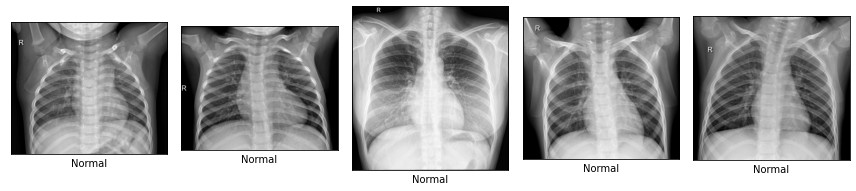

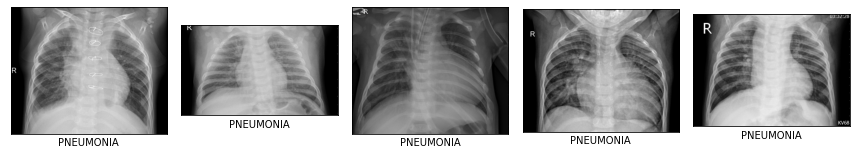

In [5]:
fig = plt.figure(figsize=(12,6))
fig.set_size_inches(12,12)

for i,image in enumerate(normal):
    plt.subplot(1,5,i+1)
    img = load_img(train_dir+"/NORMAL"+"/"+image)
    plt.imshow(img)
    plt.xlabel("Normal")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout();

plt.figure(figsize=(12,6))
fig.set_size_inches(12,12)

for i,image in enumerate(pneumonia):
    plt.subplot(1,5,i+1)
    img = load_img(train_dir+"/PNEUMONIA"+"/"+image)
    plt.imshow(img)
    plt.xlabel("PNEUMONIA")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout();
    

In [6]:
print("Total images in Train directory: {}".format(len(os.listdir(train_dir+"/NORMAL")) + len(os.listdir(train_dir+"/PNEUMONIA"))))
print("Total images in Test directory: {}".format(len(os.listdir(test_dir+"/NORMAL")) + len(os.listdir(test_dir+"/PNEUMONIA"))))
print("Total images in Validation directory: {}".format(len(os.listdir(valid_dir+"/NORMAL")) + len(os.listdir(valid_dir+"/PNEUMONIA"))))

Total images in Train directory: 5216
Total images in Test directory: 624
Total images in Validation directory: 16


><h3> Data Augmentation:</h3>

>>Data Augmentation involves a suite of techniques that boost the size and value of training datasets such that better Deep Learning models can be built using them.Here we have a small number of images in our training  dataset,so image data augmentation can helps us to increase the models performance by increasing the number of images by doing some operation i.e Zooming,shear,flip etc

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=(1./255),shear_range = 0.2,zoom_range=0.3,
                                horizontal_flip=True)#fill_mode='nearest'
test_datagen = ImageDataGenerator(rescale = (1./255))

train_data = train_datagen.flow_from_directory(directory = train_dir,target_size=(224,224),
                                               class_mode = "categorical",batch_size=32)
test_data = test_datagen.flow_from_directory(directory = test_dir,target_size=(224,224),
                                                class_mode = "categorical",batch_size=32)


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


><h3>Model Building:</h3>

- Here i'm going to use Transfer learning model VGG19.VGG19 is a variant of VGG model which in short consists of 19 layers (16 convolution layers, 3 Fully connected layer, 5 MaxPool layers and 1 SoftMax layer). There are other variants of VGG like VGG11, VGG16 and others. VGG19 has 19.6 billion FLOPs.


> <h3>VGG19 Architecture:</h3>

- A fixed size of (224 * 224) RGB image was given as input to this network which means that the matrix was of shape (224,224,3).
- The only preprocessing that was done is that they subtracted the mean RGB value from each pixel, computed over the whole training set.
- Used kernels of (3 * 3) size with a stride size of 1 pixel, this enabled them to cover the whole notion of the image.
- spatial padding was used to preserve the spatial resolution of the image.
- max pooling was performed over a 2 * 2 pixel windows with sride 2.
- this was followed by Rectified linear unit(ReLu) to introduce non-linearity to make the model classify better and to improve computational time as the previous models used tanh or sigmoid functions this proved much better than those.
- implemented three fully connected layers from which first two were of size 4096 and after that a layer with 1000 channels for 1000-way ILSVRC classification and the final layer is a softmax function.

In [9]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19(weights = "imagenet",include_top = False,input_shape=(224,224,3))

80142336/80134624 [==============================] - 2s 0us/step


In [10]:
for layer in vgg.layers:
    layer.trainable = False

In [12]:
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
x = vgg.output
x = Flatten()(x)
#x = Dense(units=4096, activation='relu')(x)
#x = BatchNormalization()(x)
#x = Dropout(0.5)(x)
predictions = Dense(2,activation= "softmax")(x)

In [13]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

model = Model(inputs = vgg.input,outputs = predictions)
model.compile(optimizer="adam",loss = "categorical_crossentropy",metrics =["accuracy"])#Adam(1e-4)

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

checkpoint = ModelCheckpoint("vgg19.h5",monitor = "val_accuracy",save_best_only=True,
                             save_weights_only=False,mode='auto',verbose=1,period=1)

earlystop = EarlyStopping(monitor="val_acc",patience=5,verbose=1)

In [18]:
history = model.fit_generator(generator = train_data,validation_data = test_data,
                              epochs = 15,verbose = 1,callbacks=[checkpoint,earlystop])#steps_per_epoch = len(train_datagen),validation_steps = len(val_datagen)

Epoch 1/15
163/163 [==============================] - ETA: 0s - loss: 0.2262 - accuracy: 0.9118
Epoch 00001: val_accuracy improved from -inf to 0.89263, saving model to vgg19.h5
163/163 [==============================] - 123s 757ms/step - loss: 0.2262 - accuracy: 0.9118 - val_loss: 0.3042 - val_accuracy: 0.8926
Epoch 2/15
163/163 [==============================] - ETA: 0s - loss: 0.1595 - accuracy: 0.9408
Epoch 00002: val_accuracy improved from 0.89263 to 0.90865, saving model to vgg19.h5
163/163 [==============================] - 110s 673ms/step - loss: 0.1595 - accuracy: 0.9408 - val_loss: 0.2678 - val_accuracy: 0.9087
Epoch 3/15
163/163 [==============================] - ETA: 0s - loss: 0.1326 - accuracy: 0.9498
Epoch 00003: val_accuracy did not improve from 0.90865
163/163 [==============================] - 108s 663ms/step - loss: 0.1326 - accuracy: 0.9498 - val_loss: 0.2566 - val_accuracy: 0.9087
Epoch 4/15
163/163 [==============================] - ETA: 0s - loss: 0.1340 - accura

In [19]:
model.evaluate_generator(test_data) #val_datagen

[0.34054455161094666, 0.8910256624221802]

In [23]:
x_test =[]
y_test = []
for i in tqdm(os.listdir("/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL")):
    img = cv2.imread("/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL" +"/"+i)
    img = cv2.resize(img,(224,224))
    x_test.append(img)
    y_test.append("Normal")
    
for i in tqdm(os.listdir("/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA")):
    img = cv2.imread("/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA" +"/"+i)
    img = cv2.resize(img,(224,224))
    x_test.append(img)
    y_test.append("PNEUMONIA")

100%|██████████| 390/390 [00:02<00:00, 133.34it/s]


In [24]:
x_test = np.array(x_test)
y_test = np.array(y_test)

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)

In [26]:
y_pred[:15]

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0])

In [28]:
unique,counts = np.unique(y_pred,return_counts=True)
print(unique,counts)

[0 1] [140 484]


In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test = le.fit_transform(y_test)

In [30]:
unique,counts = np.unique(y_test,return_counts=True)
print(unique,counts)

[0 1] [234 390]


In [31]:
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.48      0.60       234
           1       0.75      0.93      0.83       390

    accuracy                           0.76       624
   macro avg       0.77      0.70      0.71       624
weighted avg       0.77      0.76      0.74       624



(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8dc5a70d90>)

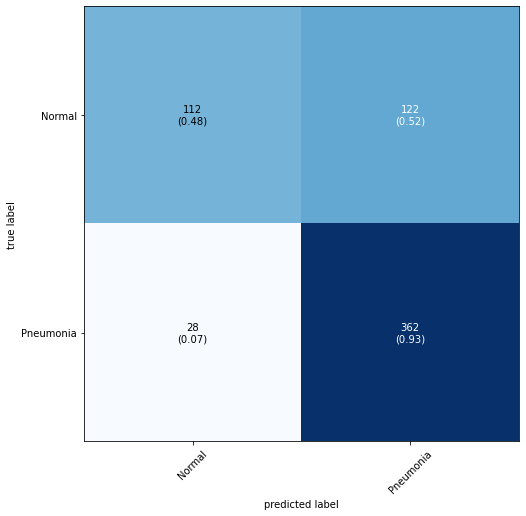

In [43]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,8),class_names = ["Normal","Pneumonia"],show_normed=True)

><h3>Learning Curve </h3>

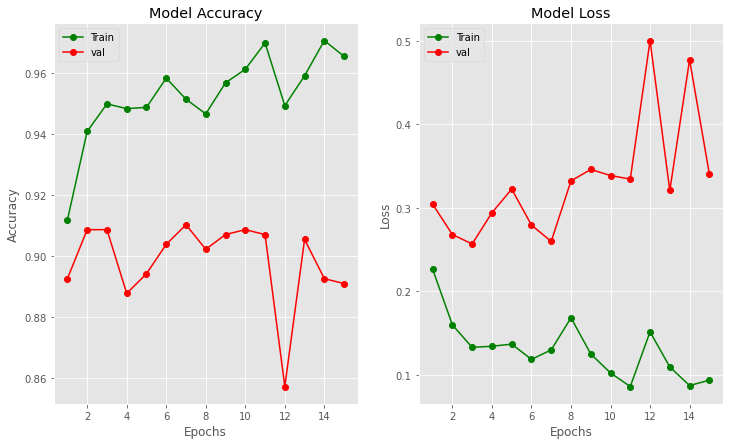

In [46]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(12,7))
epochs = range(1,16)
plt.subplot(1,2,1)
plt.plot(epochs,history.history["accuracy"],"go-")
plt.plot(epochs,history.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")
#plt.show()

#fig = plt.figure(figsize=(12,8))    
plt.subplot(1,2,2)
plt.plot(epochs,history.history["loss"],"go-")
plt.plot(epochs,history.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

><h3>Actual vs Predicted Result:</h3>

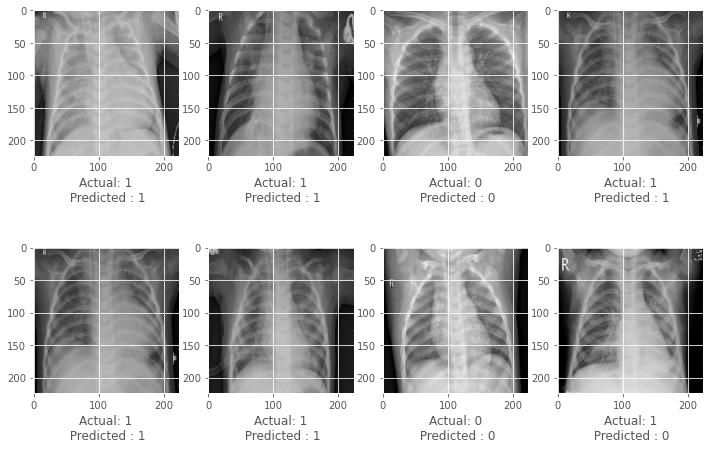

In [51]:
plt.figure(figsize=(12,8))
#plt.title("0 for Normal & 1 is for Pneumonia")
for i in range(8):
    sample_index = np.random.randint(1,len(y_test))
    plt.subplot(2,4,i+1)
    plt.imshow(x_test[sample_index])
    plt.xlabel("Actual: {}\n Predicted : {}".format(y_test[sample_index],y_pred[sample_index]))

---

<h1 style="text-align: center;font-size: 20px;">Thanks for Reading!!</h1>

---